In [54]:
from pyspark import SparkContext, SparkConf

In [55]:
import datetime as datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(15.7,10.27)})

In [13]:
events = pd.read_csv('/home/nicolas/Descargas/spark-2.3.1-bin-hadoop2.7/events.csv')

In [153]:
events['timestamp'] =  pd.to_datetime(events['timestamp'])
events['operating_system_version'] = events['operating_system_version'].astype('|S')


In [33]:
events

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,weekday
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,Thursday
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1,Tuesday
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monday
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0,Monday


In [15]:
events_groupby_model=events.groupby('model')['timestamp'].count().sort_values(ascending=False)

In [16]:
events_groupby_model

model
iPhone 6                                     50916
iPhone 5s                                    44878
iPhone 6S                                    39296
iPhone 7                                     27556
Samsung Galaxy S7 Edge                       23926
Samsung Galaxy S7                            19337
iPhone 7 Plus                                18792
Samsung Galaxy S8                            16959
iPhone SE                                    16531
Samsung Galaxy J5                            13044
iPhone 6S Plus                               12855
iPhone 6 Plus                                12766
iPhone 5c                                    12689
Samsung Galaxy S6 Flat                       11608
Samsung Galaxy S6 Edge                       11175
Samsung Galaxy S8 Plus                       10502
iPhone 5                                      9342
Samsung Galaxy J7 Prime                       9312
Motorola Moto G4 Plus                         8080
Samsung Galaxy J7        

In [17]:
events_groupby_OS=events.groupby('operating_system_version').count()

In [18]:
events_groupby_OS

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,browser_version
operating_system_version,,,,,,,,,,,,,,,,,,,,,
Android,16,16,16,0,0,0,0,0,0,0,...,0,0,16,16,16,16,16,16,16,16
Android 2.3.6,8,8,8,0,0,0,0,0,0,0,...,0,0,8,8,8,8,8,8,8,8
Android 3.1,2,2,2,0,0,0,0,0,0,0,...,0,0,2,2,2,2,2,2,2,2
Android 3.2,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
Android 4.0.3,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
Android 4.0.4,53,53,53,0,0,0,0,0,0,0,...,0,0,53,53,53,53,53,53,53,53
Android 4.1.1,5,5,5,0,0,0,0,0,0,0,...,0,0,5,5,5,5,5,5,5,5
Android 4.1.2,519,519,519,0,0,0,0,0,0,0,...,0,0,519,519,519,519,519,519,519,519
Android 4.2.2,566,566,566,0,0,0,0,0,0,0,...,0,0,566,566,566,566,566,566,566,566


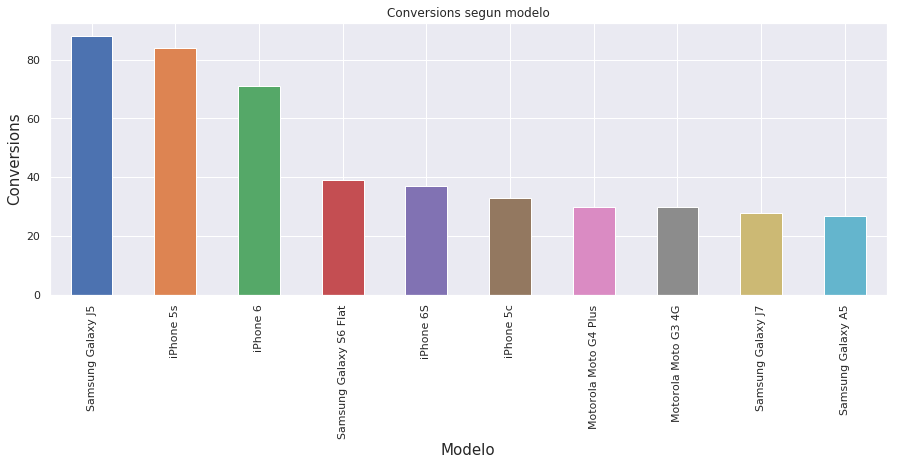

In [24]:
# Checkouts segun Modelo
events.loc[events['event']=='conversion'].groupby('model').count()['timestamp'].sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,5))
plt.title('Conversions segun modelo')
plt.ylabel("Conversions", size=15)
plt.xlabel("Modelo", size=15)
plt.show()

In [120]:
print(events.loc[events['event']=='conversion']['model'].str.contains('iPhone', case=False, regex=False).count())
events.loc[events['event']=='conversion']['model'].str.contains('n', case=False, regex=False).count()
events.loc[events['event']=='conversion'].count()

timestamp                   1172
event                       1172
person                      1172
url                            0
sku                         1172
model                       1172
condition                   1172
storage                     1172
color                       1172
skus                           0
search_term                    0
staticpage                     0
campaign_source                0
search_engine                  0
channel                        0
new_vs_returning               0
city                           0
region                         0
country                        0
device_type                    0
screen_resolution              0
operating_system_version       0
browser_version                0
weekday                     1172
hour                        1172
dtype: int64

In [25]:
events_groupby_region=events.groupby('region')

In [26]:
events_groupby_region['event'].value_counts().sort_values(ascending=False).head(10)

region             event       
Sao Paulo          visited site    24996
Unknown            visited site    14772
Minas Gerais       visited site     7755
Rio de Janeiro     visited site     6913
Bahia              visited site     5737
Pernambuco         visited site     2962
Ceara              visited site     2829
Parana             visited site     2602
Rio Grande do Sul  visited site     2576
Federal District   visited site     1739
Name: event, dtype: int64

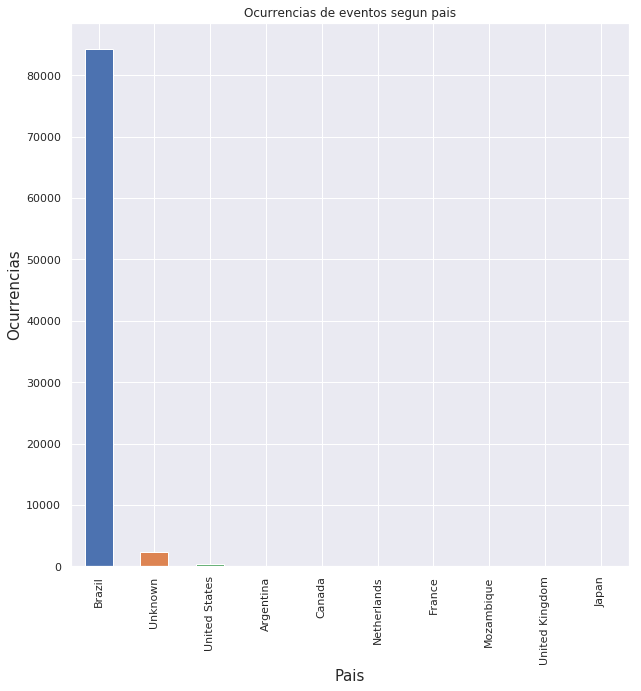

In [189]:
#Grfico eventos segun pais
events.groupby('country')['event'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,10))
plt.title('Ocurrencias de eventos segun pais')
plt.ylabel("Ocurrencias", size=15)
plt.xlabel("Pais", size=15)
plt.show()

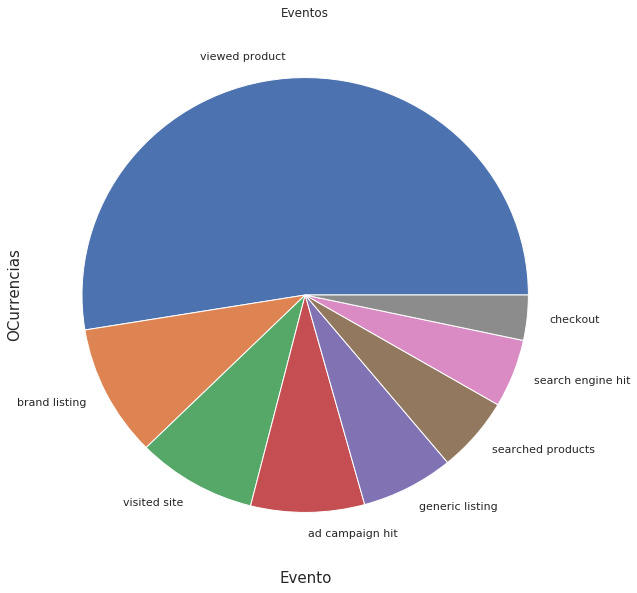

In [190]:
#Grafico segun evento
events_groupby_event['timestamp'].count().sort_values(ascending=False).head(8).plot(kind='pie',figsize=(10,10))
plt.title('Eventos')
plt.ylabel("OCurrencias", size=15)
plt.xlabel("Evento", size=15)
plt.show()

In [29]:
events_groupby_timestamp=events.groupby('timestamp')

In [64]:
events['weekday']=events['timestamp'].apply(lambda x: x.day_name())

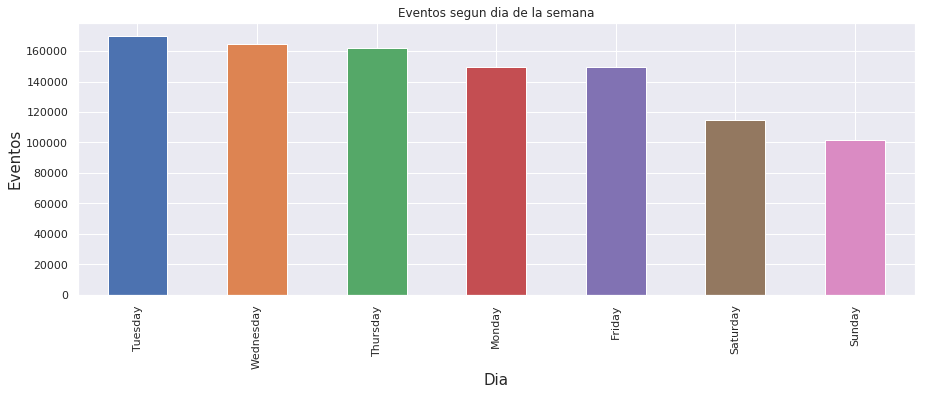

In [191]:
#Grafico Eventos segun dia de la semana
events.groupby('weekday')['event'].count().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun dia de la semana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Dia", size=15)
plt.show()

In [50]:
events['hour']=events['timestamp'].dt.hour

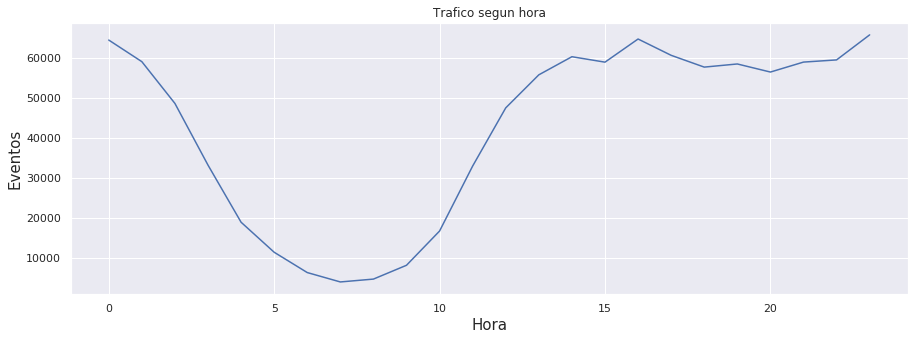

In [188]:
#Grafico Trafico Segun hora
events.groupby('hour')['hour'].count().plot(kind='line',figsize=(15,5))
plt.title('Trafico segun hora')
plt.ylabel("Eventos", size=15)
plt.xlabel("Hora", size=15)
plt.show()

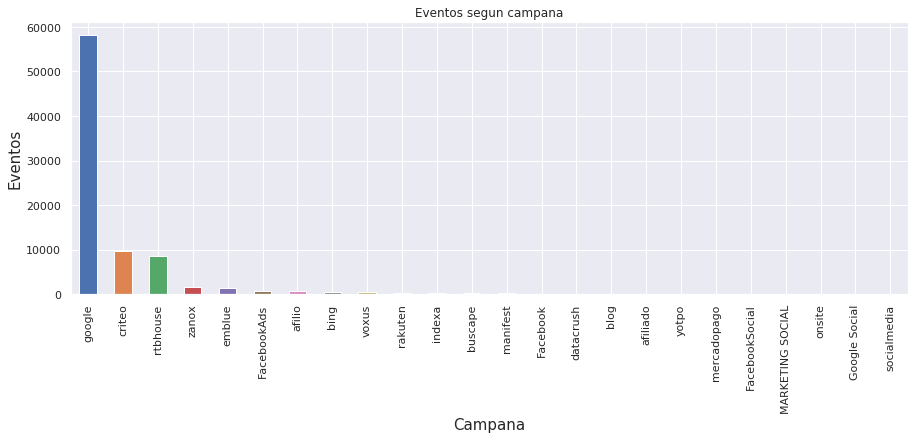

In [60]:
#grafico eventos segun campaña
events.loc[events['event']=='ad campaign hit'].groupby('campaign_source').count()['timestamp'].sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Eventos segun campana')
plt.ylabel("Eventos", size=15)
plt.xlabel("Campana", size=15)
plt.show()

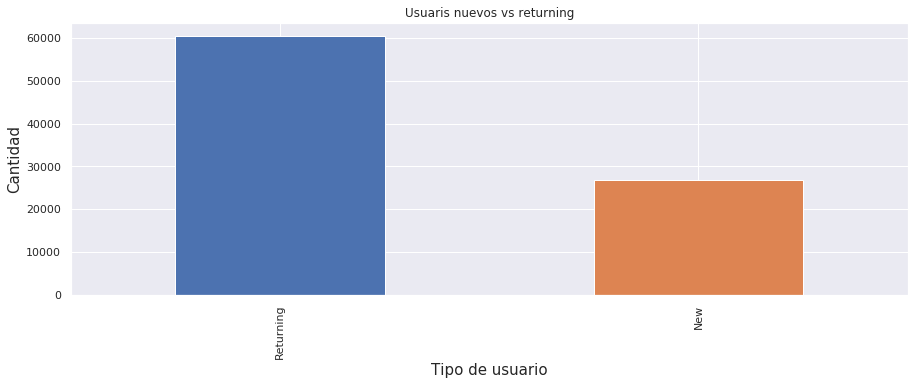

In [147]:
#Grafico new vs returnimg
events['new_vs_returning'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Usuaris nuevos vs returning')
plt.ylabel("Cantidad", size=15)
plt.xlabel("Tipo de usuario", size=15)
plt.show()

In [168]:
#events['operating_system_version'].str.contains('android',case=False,regex=False).value_counts()
#events['operating_system_version'].str.contains('ios',case=False,regex=False).value_counts()
events['operating_system_version'].str.contains('mac os',case=False,regex=False).value_counts()
#events['operating_system_version'].str.contains('windows',case=False,regex=False).value_counts()
#events['operating_system_version'].str.contains('linux',case=False,regex=False).value_counts()
#events['operating_system_version'].str.contains('ubuntu',case=False,regex=False).value_counts()

False    1010882
True         406
Name: operating_system_version, dtype: int64

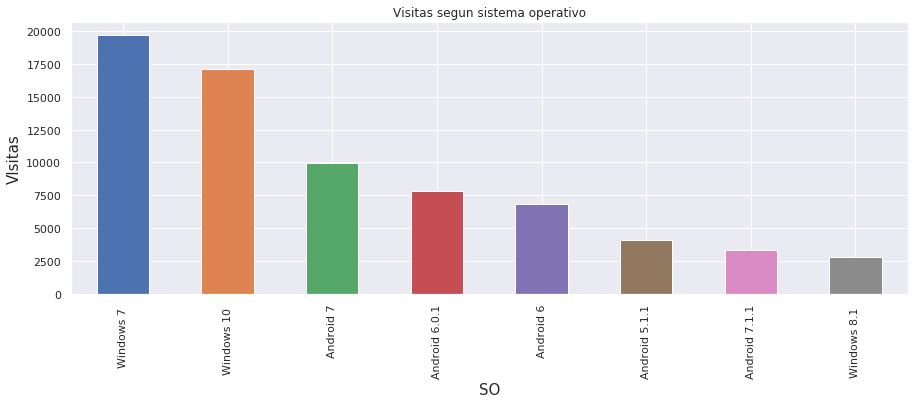

In [186]:
#Grafico visitas segun sistema operativo
events.loc[~events['operating_system_version'].str.contains('nan',case=False,regex=False)]['operating_system_version'].value_counts().head(8).sort_values(ascending=False).plot(kind='bar',figsize=(15,5))
plt.title('Visitas segun sistema operativo')
plt.ylabel("VIsitas", size=15)
plt.xlabel("SO", size=15)
plt.show()